In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [70]:
reg_path = "Assignment/data/RESISTORS/"

In [71]:
# 加载上传的图片
img_path = reg_path+'RESISTORS-1.png'
img = Image.open(img_path)

# 定义一个函数来分离图片中的电阻
def separate_resistors(image):
    # 假设电阻均匀排列，且图片背景为白色
    # 我们可以通过寻找大部分为白色的列来找到电阻之间的间隙
    # 对于不同的图片质量或电阻排列，可能需要调整这种方法

    width, height = image.size
    pixels = image.load()

    # 确定列是否为电阻间隙的阈值
    # 如果一列中超过90%的像素为白色，我们将其视为间隙
    gap_threshold = height * 0.9
    white_threshold = 250  # 被认为是白色的颜色值

    # 寻找间隙
    gap_indices = []
    for x in range(width):
        white_count = sum(1 for y in range(height) if pixels[x, y] >= (white_threshold, white_threshold, white_threshold))
        if white_count > gap_threshold:
            gap_indices.append(x)

    # 使用间隙确定每个电阻的边界框
    resistor_bounds = []
    start_x = 0
    for gap_x in gap_indices:
        end_x = gap_x
        if end_x - start_x > 1:  # 避免添加零宽度的边界框
            resistor_bounds.append((start_x, 0, end_x, height))
        start_x = gap_x + 1

    # 添加最后一个电阻（如果有的话）
    if start_x < width:
        resistor_bounds.append((start_x, 0, width, height))

    # 将图像裁剪到每个边界框，并将电阻作为单独的图像保存
    resistor_images = [image.crop(bounds) for bounds in resistor_bounds]
    return resistor_images

# 分离电阻
resistor_imgs = separate_resistors(img)

# 保存分离后的电阻图像
separated_img_paths = []
for i, resistor_img in enumerate(resistor_imgs):
    path = f'resistor_{i}.png'
    resistor_img.save(path)
    separated_img_paths.append(path)

separated_img_paths


['resistor_0.png',
 'resistor_1.png',
 'resistor_2.png',
 'resistor_3.png',
 'resistor_4.png',
 'resistor_5.png']

In [72]:
# Load the image
image_path = 'resistor_0.png'
image = Image.open(image_path)

# Convert the image to RGBA if it is not already
image = image.convert('RGBA')

# Convert the image to numpy array
data = np.array(image)

# Define a threshold for white color
# Considering white as all colors being greater than 240 out of 255
white_threshold = 240

# Create a mask where white is set to True and the rest to False
white_areas = (data[:,:,0] > white_threshold) \
              & (data[:,:,1] > white_threshold) \
              & (data[:,:,2] > white_threshold)

# Set the alpha channel to 0 for all white areas (making them transparent)
data[white_areas, -1] = 0

# Convert the numpy array back to an image
image_no_white = Image.fromarray(data)

# Save the image without white background
output_path = 'RESISTORS_0_no_white.png'
image_no_white.save(output_path)

output_path


'RESISTORS_0_no_white.png'

In [73]:
# We'll need to change our approach slightly since we need to check the transparency horizontally instead of vertically.

# Load the image again to reset to the original
image = Image.open(output_path)

# Get the size of the image
width, height = image.size

# Initialize a list to hold the new image data
new_data = []

# Process the image horizontally
for y in range(height):
    row = [image.getpixel((x, y)) for x in range(width)]  # Get the entire row
    # Calculate the number of non-transparent pixels in the row
    opaque_count = sum(1 for pixel in row if pixel[3] >= (255 / 2))
    # Determine if the opaque pixels in this row are less than 50% of the row's width
    if opaque_count < (width / 2):
        # If less than 50%, make the entire row transparent
        new_row = [(255, 255, 255, 0) for _ in range(width)]
    else:
        # Otherwise, keep the row as it is
        new_row = row
    # Add the new row to the new data list
    new_data.extend(new_row)

# Update image data
image.putdata(new_data)

# Save the new image
new_image_path_horizontal = 'RESISTORS_transparent_horizontal.png'
image.save(new_image_path_horizontal)

new_image_path_horizontal


'RESISTORS_transparent_horizontal.png'

In [108]:
from PIL import Image

def process_image(input_path, output_path):
    # 加载原始图像
    image = Image.open(input_path)
    width, height = image.size

    # 初始化一个列表来存储要保留的行
    rows_to_keep = []

    # 处理图像水平方向
    for y in range(height):
        row = [image.getpixel((x, y)) for x in range(width)]  # 获取整行像素
        opaque_count = sum(1 for pixel in row if pixel[3] >= (255 / 2))

        # 如果不透明像素超过行宽的50%，则保留这行
        if opaque_count >= (width / 2):
            rows_to_keep.append(row)

    # 创建新图像
    new_height = len(rows_to_keep)
    new_image = Image.new('RGB', (width, new_height))  # JPEG不支持透明度，因此使用'RGB'模式

    # 将保留的行复制到新图像
    for y, row in enumerate(rows_to_keep):
        for x, pixel in enumerate(row):
            new_image.putpixel((x, y), (pixel[0], pixel[1], pixel[2]))  # 忽略透明度

    # 保存为JPEG
    new_image.save(output_path, 'JPEG')

input_path = 'RESISTORS_0_no_white.png'
output_path = 'RESISTORS_transparent_horizonta2l.jpg'
process_image(input_path, output_path)
0, 255, 0)  # 例如绿色
process_image(input_path, output_path, fill_color)
fill_color=(255, 255, 255)

In [ ]:
from PIL import Image

def process_image(input_path, output_path, fill_color=(255, 255, 255)):
    # 加载原始图像
    image = Image.open(input_path)
    width, height = image.size

    # 初始化一个列表来存储要保留的行
    rows_to_keep = []

    # 处理图像水平方向
    for y in range(height):
        row = [image.getpixel((x, y)) for x in range(width)]  # 获取整行像素
        new_row = []

        for pixel in row:
            if pixel[3] >= (255 / 2):
                new_row.append(pixel[:3])  # 保留不透明或半透明像素，忽略透明度
            else:
                new_row.append(fill_color)  # 用填充色替换透明像素

        # 如果行中有不透明像素，保留这行
        if any(pixel[3] >= (255 / 2) for pixel in row):
            rows_to_keep.append(new_row)

    # 创建新图像
    new_height = len(rows_to_keep)
    new_image = Image.new('RGB', (width, new_height))

    # 将保留的行复制到新图像
    for y, row in enumerate(rows_to_keep):
        for x, pixel in enumerate(row):
            new_image.putpixel((x, y), pixel)

    # 保存为JPEG
    new_image.save(output_path, 'JPEG')

input_path = 'RESISTORS_0_no_white.png'
output_path = 'RESISTORS_transparent_horizontal.jpg'
fill_color = (255, 192, 203)  # 例如绿色
process_image(input_path, output_path, fill_color)
fill_color=(255, 255, 255)

In [115]:
from PIL import Image

def process_image(input_path, output_path, target_color=(255, 192, 203), threshold=0.5):
    # Load the original image
    image = Image.open(input_path)
    width, height = image.size

    # Initialize a list to store rows to keep
    rows_to_keep = []

    # Process image horizontally
    for y in range(height):
        row = [image.getpixel((x, y)) for x in range(width)]  # Get entire row of pixels
        target_color_count = sum(1 for pixel in row if pixel[:3] == target_color)

        # Keep the row if target color pixels are less than the threshold percentage of the row
        if target_color_count < width * threshold:
            rows_to_keep.append(row)

    # Create new image
    new_height = len(rows_to_keep)
    new_image = Image.new('RGB', (width, new_height))  # Use 'RGB' mode as JPEG does not support transparency

    # Copy kept rows to the new image
    for y, row in enumerate(rows_to_keep):
        for x, pixel in enumerate(row):
            new_image.putpixel((x, y), (pixel[0], pixel[1], pixel[2]))

    # Save as JPEG
    new_image.save(output_path, 'JPEG')

# Usage example
input_path = 'RESISTORS_transparent_horizontal.jpg'
output_path = 'RESISTORS_transparent_horizontal3.jpg'
target_color = (255, 192, 203)  # The specific color you're looking for
threshold = 0.5  # Threshold for target color presence in a row

process_image(input_path, output_path, target_color, threshold)


In [104]:
# Define a function to check if a pixel is within a specified color range
def is_color(pixel, base_color, threshold):
    return all(abs(pixel[i] - base_color[i]) <= threshold for i in range(3))

# Define the color range for the beige color we want to make transparent
beige_color = (198, 177, 150)  # RGB for beige
beige_threshold = 60  # Color difference threshold

# Create a new image with the same size as the original, filled with transparent background
transparent_img = Image.new("RGBA", image.size, (255, 255, 255, 0))
transparent_data = []

# Go through the image data row by row
for y in range(height):
    row_data = []
    for x in range(width):
        pixel = image.getpixel((x, y))
        # Check if the pixel color is within the range of beige
        if is_color(pixel, beige_color, beige_threshold):
            # If it is beige, add a transparent pixel to the row data
            row_data.append((255, 255, 255, 0))
        else:
            # If it is not beige, add the original pixel to the row data
            row_data.append(pixel)
    # Add the processed row data to the new image data
    transparent_data.extend(row_data)

# Update the transparent image with the new data
transparent_img.putdata(transparent_data)

# Save the new image
new_image_path_bands_only = 'RESISTORS_bands_only.png'
transparent_img.save(new_image_path_bands_only)

new_image_path_bands_only


ValueError: Size must be a tuple

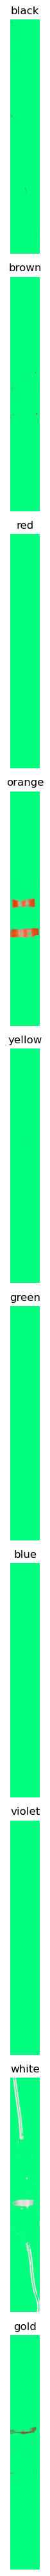

In [109]:
def colorRange(self, h_range, s_range, v_range):
    self.h_range = h_range  # (lower_h, upper_h)
    self.s_range = s_range  # (lower_s, upper_s)
    self.v_range = v_range  # (lower_v, upper_v)

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'RESISTORS_transparent_horizontal.jpg'
resistor_image = cv2.imread(image_path)

# Convert to HSV color space
hsv_image = cv2.cvtColor(resistor_image, cv2.COLOR_BGR2HSV)

# Define the color boundaries in HSV
color_boundaries = {
    'black': ([0, 0, 0], [180, 255, 70]),
    'brown': ([1, 100, 100], [12, 255, 170]),
    'red': ([80, 150, 100], [200, 255, 255]),
    'orange': ([5, 100, 160], [15, 255, 255]),
    'yellow': ([17, 100, 180], [25, 255, 255]),
    'green': ([35, 100, 0], [85, 255, 255]),
    'blue': ([85, 100, 100], [135, 255, 255]),
    'violet': ([100, 80, 80], [160, 255, 255]), #没问题
    # 'grey': ([0, 0, 40], [180, 50, 80]), 
    'white': ([0, 0, 200], [180, 20, 255]),
    'gold': ([12, 100, 100], [20, 200, 240]), #没问题
    # 'silver': ([0, 0, 50], [180, 15, 255])  
}

# Function to apply the mask and show the color segmentation
def mask_and_show_color(hsv, color_range):
    # Create a mask for the color range
    lower_bound = np.array(color_range[0], dtype="uint8")
    upper_bound = np.array(color_range[1], dtype="uint8")
    color_mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    # Apply the mask to the image
    color_segment = cv2.bitwise_and(hsv, hsv, mask=color_mask)

    # Change black background to white
    white_background = cv2.bitwise_not(cv2.bitwise_not(color_segment, mask=color_mask))
    return white_background


# Apply mask for each color and display them
color_segments = {color: mask_and_show_color(hsv_image, range) for color, range in color_boundaries.items()}

# Convert back to RGB for displaying with matplotlib
color_segments_rgb = {color: cv2.cvtColor(segment, cv2.COLOR_HSV2RGB) for color, segment in color_segments.items()}

# Plotting the color segments
n_colors = len(color_segments_rgb)
plt.figure(figsize=(30, 40))

for i, (color, segment) in enumerate(color_segments_rgb.items(), 1):

    plt.subplot(n_colors, 1, i)
    plt.title(color)
    plt.imshow(segment)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [77]:
# Let's write a complete function that takes an image of a resistor and returns the colors from top to bottom.

def identify_resistor_bands(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color boundaries in HSV
    color_boundaries = {
        'black': ([0, 0, 0], [180, 255, 70]),
        'brown': ([1, 100, 100], [12, 255, 170]),
        'red': ([80, 150, 100], [200, 255, 255]),
        'orange': ([5, 100, 160], [15, 255, 255]),
        'yellow': ([15, 100, 160], [25, 255, 255]),
        'green': ([35, 100, 0], [85, 255, 255]),
        'blue': ([85, 100, 100], [135, 255, 255]),
        'violet': ([100, 80, 80], [160, 255, 255]), #没问题
        # 'grey': ([0, 0, 40], [180, 50, 80]), 
        'white': ([0, 0, 200], [180, 20, 255]),
        'gold': ([11, 60, 100], [30, 255, 180]), #没问题
        # 'silver': ([0, 0, 50], [180, 15, 255])  
    }

    # Create a mask for each color and determine the centroid
    color_positions = []
    for color, (lower, upper) in color_boundaries.items():
        lower_bound = np.array(lower, dtype="uint8")
        upper_bound = np.array(upper, dtype="uint8")
        mask = cv2.inRange(hsv, lower_bound, upper_bound)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Get the centroid of the largest contour
        if contours:
            c = max(contours, key=cv2.contourArea)
            M = cv2.moments(c)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                color_positions.append((color, cy))

    # Sort the detected colors by their vertical position (top to bottom)
    color_positions.sort(key=lambda x: x[1])

    # Return the sorted colors
    return [color for color, _ in color_positions]

# Use the function to identify the resistor bands from the image
resistor_bands = identify_resistor_bands('resistor_0.png')
resistor_bands


['white', 'gold', 'yellow', 'brown', 'orange']

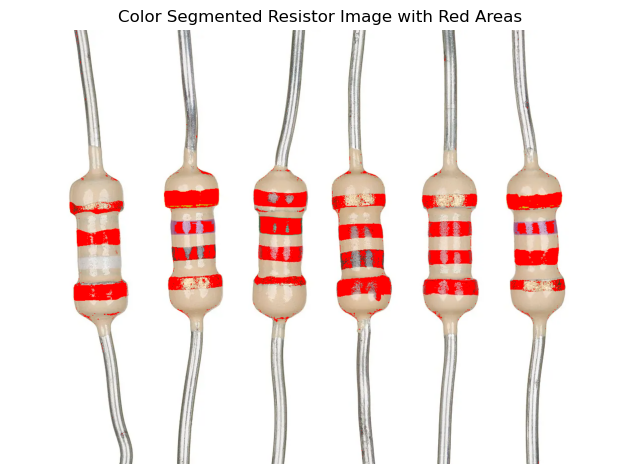

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'RESISTORS-1.png'
resistor_image = cv2.imread(image_path)

# Convert to HSV color space
hsv_image = cv2.cvtColor(resistor_image, cv2.COLOR_BGR2HSV)

# Define the color boundaries in HSV
    # Define the color boundaries in HSV
color_boundaries = {
    'black': ([0, 0, 0], [180, 255, 70]),
    'brown': ([1, 100, 100], [12, 255, 170]),
    'red': ([80, 150, 100], [200, 255, 255]),
    'orange': ([5, 100, 160], [15, 255, 255]),
    'yellow': ([15, 100, 160], [25, 255, 255]),
    'green': ([35, 100, 0], [85, 255, 255]),
    'blue': ([85, 100, 100], [135, 255, 255]),
    'violet': ([100, 80, 80], [160, 255, 255]), #没问题
    # 'grey': ([0, 0, 40], [180, 50, 80]), 
    #'white': ([0, 0, 200], [180, 20, 255]),
    'gold': ([11, 60, 100], [30, 255, 180]), #没问题
    # 'silver': ([0, 0, 50], [180, 15, 255])  
}

# Function to create a mask for a given color range
def create_mask(hsv, color_range):
    lower_bound = np.array(color_range[0], dtype="uint8")
    upper_bound = np.array(color_range[1], dtype="uint8")
    return cv2.inRange(hsv, lower_bound, upper_bound)

# Create a blank mask
combined_mask = np.zeros(hsv_image.shape[:2], dtype="uint8")

# Create masks for each color range and combine them
for color_range in color_boundaries.values():
    color_mask = create_mask(hsv_image, color_range)
    combined_mask = cv2.bitwise_or(combined_mask, color_mask)

# Create a red color layer
red_layer = np.zeros_like(resistor_image)
red_layer[:] = (0, 0, 255)  # BGR format for red

# Apply the mask to the red layer
red_areas = cv2.bitwise_and(red_layer, red_layer, mask=combined_mask)

# Apply the inverse of the mask to the original image
inverse_mask = cv2.bitwise_not(combined_mask)
original_areas = cv2.bitwise_and(resistor_image, resistor_image, mask=inverse_mask)

# Combine the red areas and the original areas
result_image = cv2.add(red_areas, original_areas)

# Convert the result to RGB for displaying with matplotlib
result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(result_rgb)
plt.title('Color Segmented Resistor Image with Red Areas')
plt.axis('off')
plt.show()


In [79]:
import cv2
import numpy as np

# Load the image
image_path = 'RESISTORS_transparent_horizonta2l.jpg'
image = cv2.imread(image_path)

# Convert image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Function to extract the HSV values along a vertical line from the image
def extract_hsv_values(hsv_image, line_position):
    # Extracting the column at line_position
    return hsv_image[:, line_position, :]

# The vertical line position (x coordinate), roughly in the middle of the image
line_position = hsv.shape[1] // 2

# Extract the HSV values along the vertical line
hsv_values = extract_hsv_values(hsv, line_position)

# Convert to list of tuples for clarity
hsv_list = [tuple(hsv_values[i]) for i in range(hsv_values.shape[0])]

# Now hsv_list contains all the HSV values along the vertical line


In [80]:
# Define the color boundaries in HSV
color_boundaries = {
    'black': ([0, 0, 0], [180, 255, 70]),
    'brown': ([1, 100, 100], [12, 255, 170]),
    'red': ([80, 150, 100], [200, 255, 255]),
    'orange': ([5, 100, 160], [15, 255, 255]),
    'yellow': ([15, 100, 160], [25, 255, 255]),
    'green': ([35, 100, 0], [85, 255, 255]),
    'blue': ([85, 100, 100], [135, 255, 255]),
    'violet': ([100, 80, 80], [160, 255, 255]), #没问题
    # 'grey': ([0, 0, 40], [180, 50, 80]), 
    'white': ([0, 0, 200], [180, 20, 255]),
    'gold': ([11, 60, 100], [30, 255, 180]), #没问题
    # 'silver': ([0, 0, 50], [180, 15, 255]) 
    
}

# Function to identify color based on HSV value
def identify_color(hsv_value, color_boundaries):
    for color, (lower, upper) in color_boundaries.items():
        if all(lower[i] <= hsv_value[i] <= upper[i] for i in range(3)):
            return color
    return 'undefined'

# Identify the color for each HSV value in the list
color_names = [identify_color(hsv, color_boundaries) for hsv in hsv_list]

# Sample of identified colors
for i in color_names:
    if i != "undefined":
        print(i)


gold
gold
gold
gold
gold
gold
gold
gold
gold
yellow
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
orange
